In [125]:
install.packages("pdp")

Installing package into ‘/home/creyesp/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [127]:
options(repr.plot.width  = 15,
        repr.plot.height = 10)

In [128]:
# Helper packages
library(dplyr)       # for data wrangling
library(ggplot2)     # for awesome plotting

# Modeling packages
library(rpart)       # direct engine for decision tree application
library(caret)       # meta engine for decision tree application

# Model interpretability packages
library(rpart.plot)  # for plotting decision trees
library(vip)         # for feature importance
library(pdp)         # for feature effects

# Split a tree

## Regression

In [129]:
data  <- data.frame(x = c(1:10), y = c(3, 2, 2, 3, 5, 5, 6, 8, 9, 8))
data

x,y
<int>,<dbl>
1,3
2,2
3,2
4,3
5,5
6,5
7,6
8,8
9,9


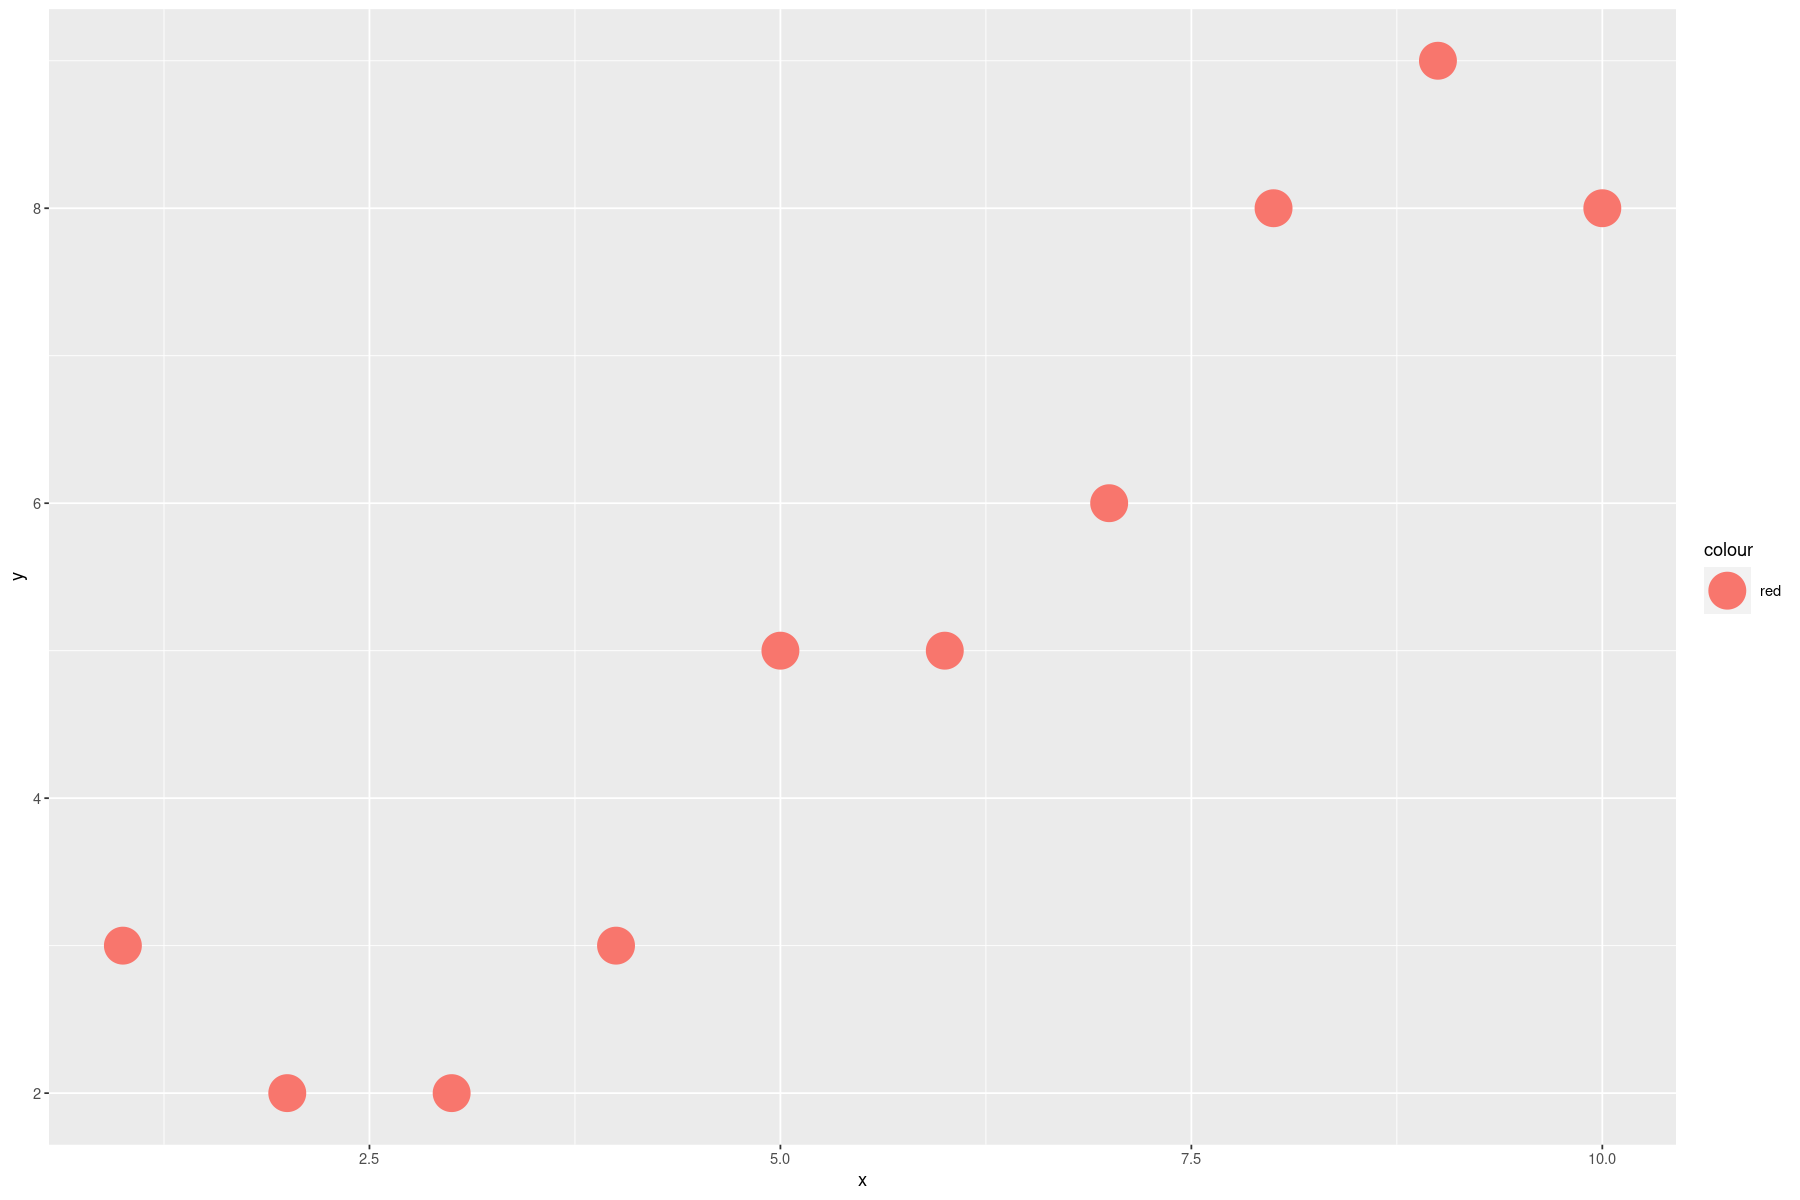

In [133]:
ggplot(data, aes(x=x, y=y, color="red")) + geom_point(size=10)

In [131]:
sse <- function(p1, p2){
  sse1 = sum((p1 - mean(p1))^2)
  sse2 = sum((p2 - mean(p2))^2)
  
  return(sse1 + sse2)
}

In [ ]:
split1 = data$x <= 7
p1 = data[split1,]
p2 = data[!split1,]
sse(p1$y, p2$y)

In [34]:
for (k in 1:10) {
    split1 = data$x <= k
    p1 = data[split1,]
    p2 = data[!split1,]
    print(paste(k, sse(p1$y, p2$y)))
}

[1] "1 56"
[1] "2 44"
[1] "3 28.0952380952381"
[1] "4 15.8333333333333"
[1] "5 16.8"
[1] "6 14.0833333333333"
[1] "7 16.0952380952381"
[1] "8 32"
[1] "9 51.5555555555556"
[1] "10 60.9"


In [135]:
split1 = data$x <= 6
p1 = data[split1,]
p2 = data[!split1,]
sse(p1$y, p2$y)

[1] 14.08333

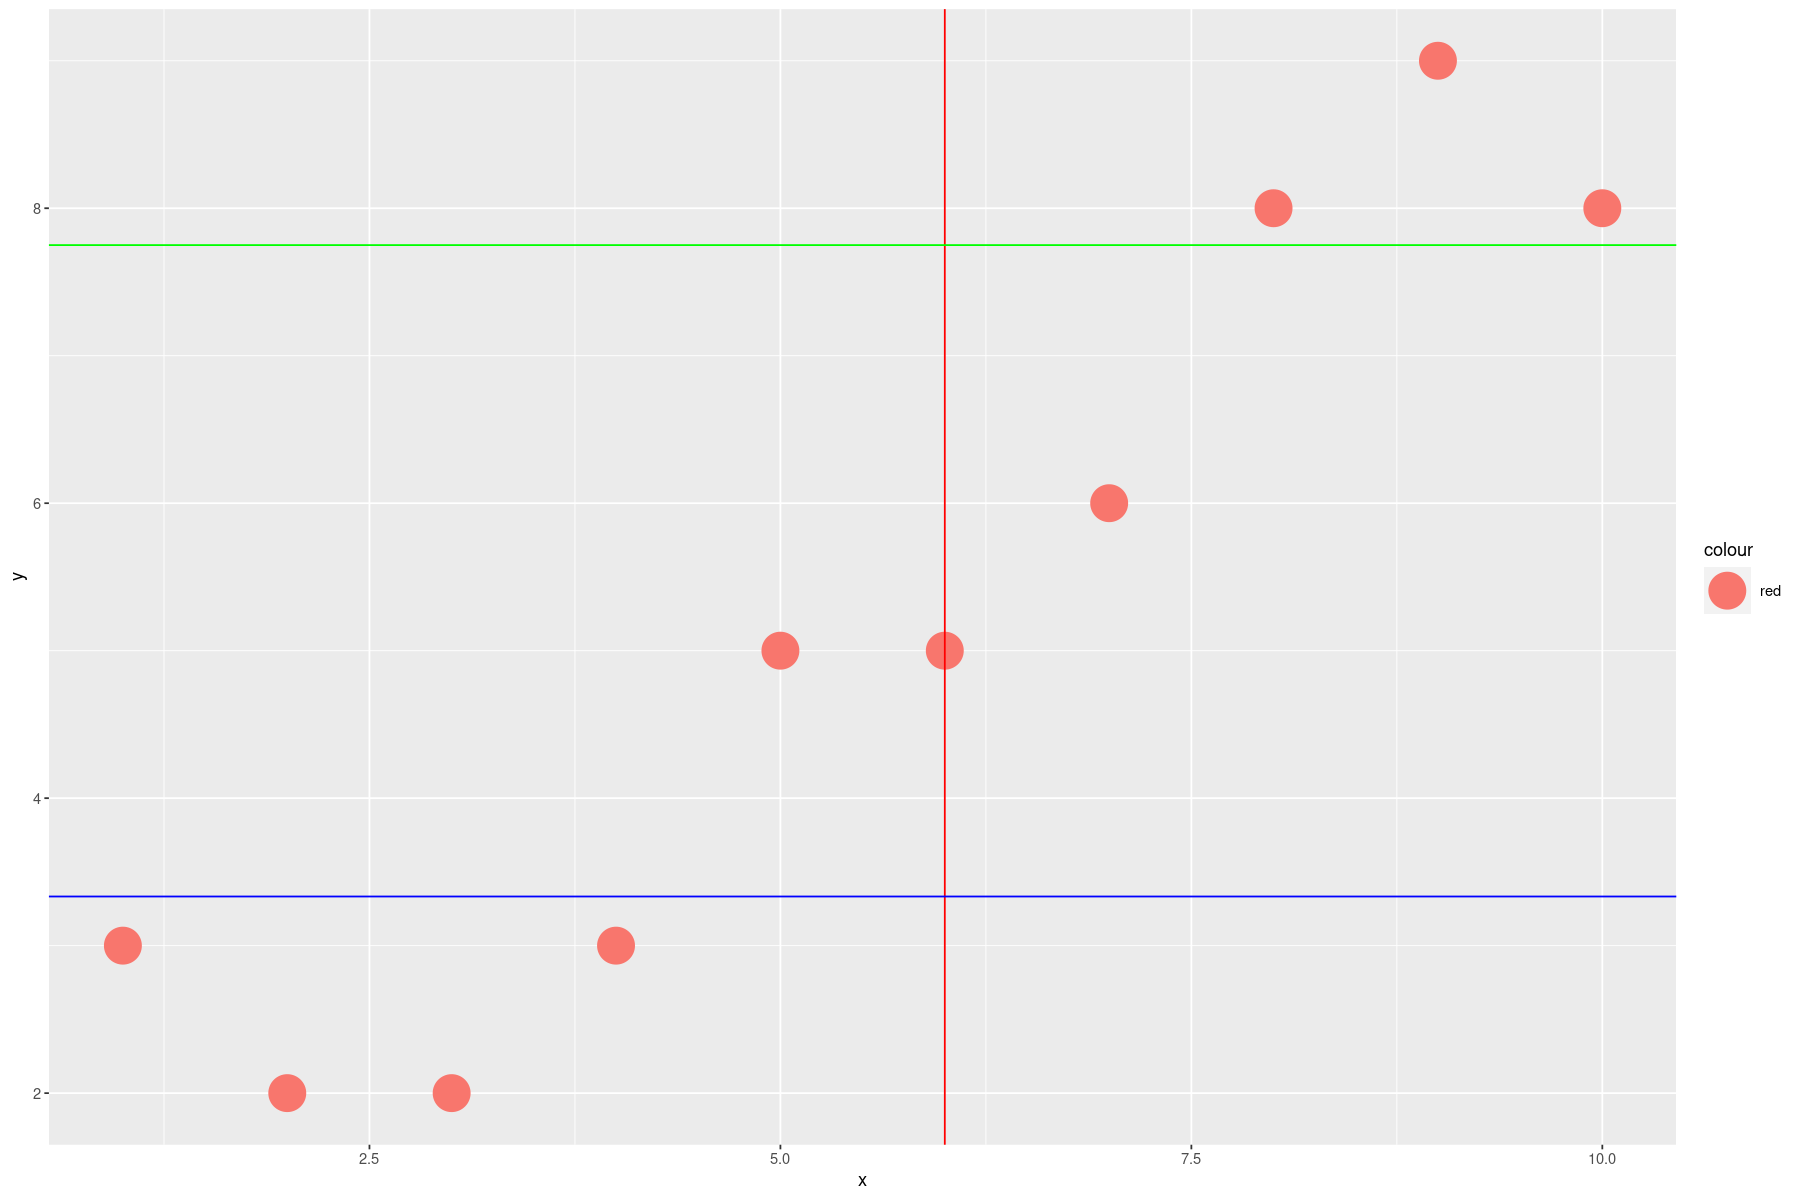

In [136]:
ggplot(data, aes(x=x, y=y, color="red")) +
    geom_point(size=10) + 
    geom_vline(xintercept = 6, color='red') + 
    geom_hline(yintercept = mean(p1$y), color='blue') + 
    geom_hline(yintercept = mean(p2$y), color='green')

In [36]:
for (k in 1:5) {
    split1 = p1$x <= k
    p1_1 = p1[split1,]
    p1_2 = p1[!split1,]
    print(paste(k, sse(p1_1$y, p1_2$y)))
}

[1] "1 9.2"
[1] "2 7.25"
[1] "3 3.33333333333333"
[1] "4 1"
[1] "5 6"


In [54]:
mean(p1$y)

[1] 3.333333

## Classification

<img src="https://hsto.org/webt/o4/nx/p7/o4nxp7itpg_zxowtmffs5xh3bbw.png">

In [57]:
data_class  <- data.frame(x = c(1:10), y = c(1, 1, 2, 2, 2, 2, 1, 1, 2, 2))
data_class

x,y
<int>,<dbl>
1,1
2,1
3,2
4,2
5,2
6,2
7,1
8,1
9,2


In [105]:
entropy <- function(data){
  p1 = mean(data == 1)
  p2 = mean(data == 2)
  result = -(p1 * log2(p1) + p2 * log2(p2))
  return(result)
}
information_gain  <- function(root, p1, p2){
    s0 = entropy(root)
    s1 = entropy(p1)
    s2 = entropy(p2)
    n0 = length(root)
    n1 = length(p1)
    n2 = length(p2)
    return (s0 - (n1*s1 + n2*s2)/n0)
}

split 0 - root node

In [106]:
s_0 = entropy(data_class$y)
s_0

[1] 0.9709506

In [107]:
split1 = data_class$x <= 7
p1 = data_class[split1,]
p2 = data_class[!split1,]
information_gain(data_class$y, p1$y, p2$y)

[1] 0.9651484

In [109]:
for (k in 1:9) {
    split1 = data_class$x <= k
    p1 = data_class[split1,]
    p1 = data_class[!split1,]
    print(paste(k, information_gain(data_class$y, p1$y, p2$y)))
}

[1] "1 1.10195500086539"
[1] "2 0.924511249783653"
[1] "3 0.879673148212989"
[1] "4 0.826466250649041"
[1] "5 0.760964047443681"
[1] "6 0.675488750216347"
[1] "7 0.550977500432694"
[1] "8 NaN"
[1] "9 NaN"


# Decision Tree - Regression

## Load data

In [111]:
ames <- AmesHousing::make_ames()

## Split Data

In [112]:
index_2 <- createDataPartition(ames$Sale_Price, p = 0.7, 
                               list = FALSE, )
house_train <- ames[index_2, ]
house_test  <- ames[-index_2, ]

Warning message:
“The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


## Modeling

In [140]:
ames_dt1 <- rpart(
  formula = Sale_Price ~ .,
  data    = house_train,
  method  = "anova"
)

node) | criterio | n_samples | sse | mean(y)

In [141]:
ames_dt1

n= 2053 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 2053 1.274350e+13 180169.90  
   2) Overall_Qual=Very_Poor,Poor,Fair,Below_Average,Average,Above_Average,Good 1719 4.121018e+12 156587.20  
     4) Neighborhood=North_Ames,Old_Town,Edwards,Sawyer,Mitchell,Brookside,Iowa_DOT_and_Rail_Road,South_and_West_of_Iowa_State_University,Meadow_Village,Briardale,Northpark_Villa,Blueste,Landmark 1044 1.429642e+12 132542.70  
       8) First_Flr_SF< 1181.5 780 6.700171e+11 123087.70  
        16) Overall_Qual=Very_Poor,Poor,Fair,Below_Average 162 1.256025e+11  93096.52 *
        17) Overall_Qual=Average,Above_Average,Good 618 3.605037e+11 130949.40 *
       9) First_Flr_SF>=1181.5 264 4.838771e+11 160477.80 *
     5) Neighborhood=College_Creek,Somerset,Northridge_Heights,Gilbert,Northwest_Ames,Sawyer_West,Crawford,Timberland,Northridge,Stone_Brook,Clear_Creek,Bloomington_Heights,Veenker,Green_Hills 675 1.154268e+12 193776.00  
      10) Gr_Liv_Area< 1725.5 473 4.74777

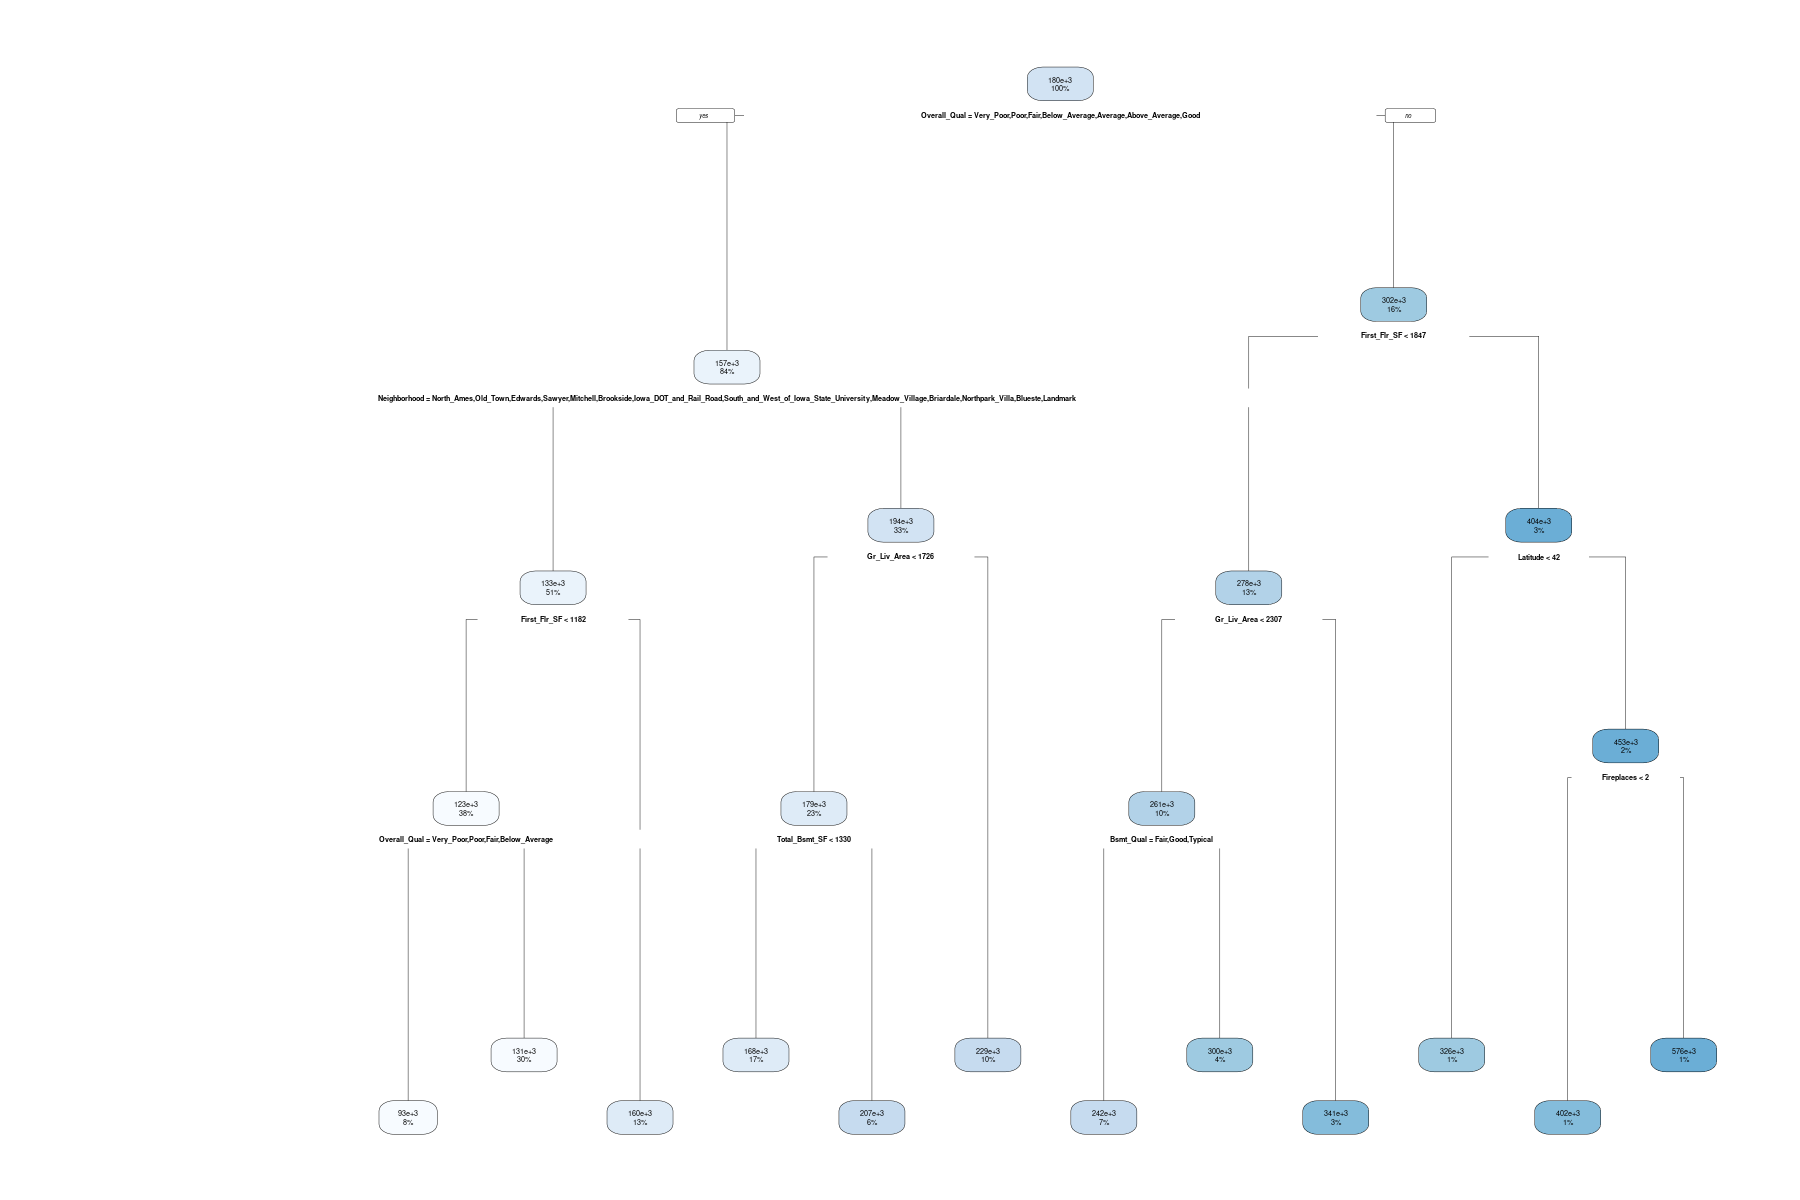

In [142]:
rpart.plot(ames_dt1)

Behind the scenes rpart() is automatically applying a range of cost complexity (α values to prune the tree). To compare the error for each α value, rpart() performs a 10-fold CV (by default). In this example we find diminishing returns after 12 terminal nodes as illustrated in Figure 9.10 (y-axis is the CV error, lower x-axis is the cost complexity (α) value, upper x-axis is the number of terminal nodes (i.e., tree size = |T|). You may also notice the dashed line which goes through the point |T|=8. Breiman (1984) suggested that in actual practice, it’s common to instead use the smallest tree within 1 standard error (SE) of the minimum CV error (this is called the 1-SE rule). Thus, we could use a tree with 8 terminal nodes and reasonably expect to experience similar results within a small margin of error.

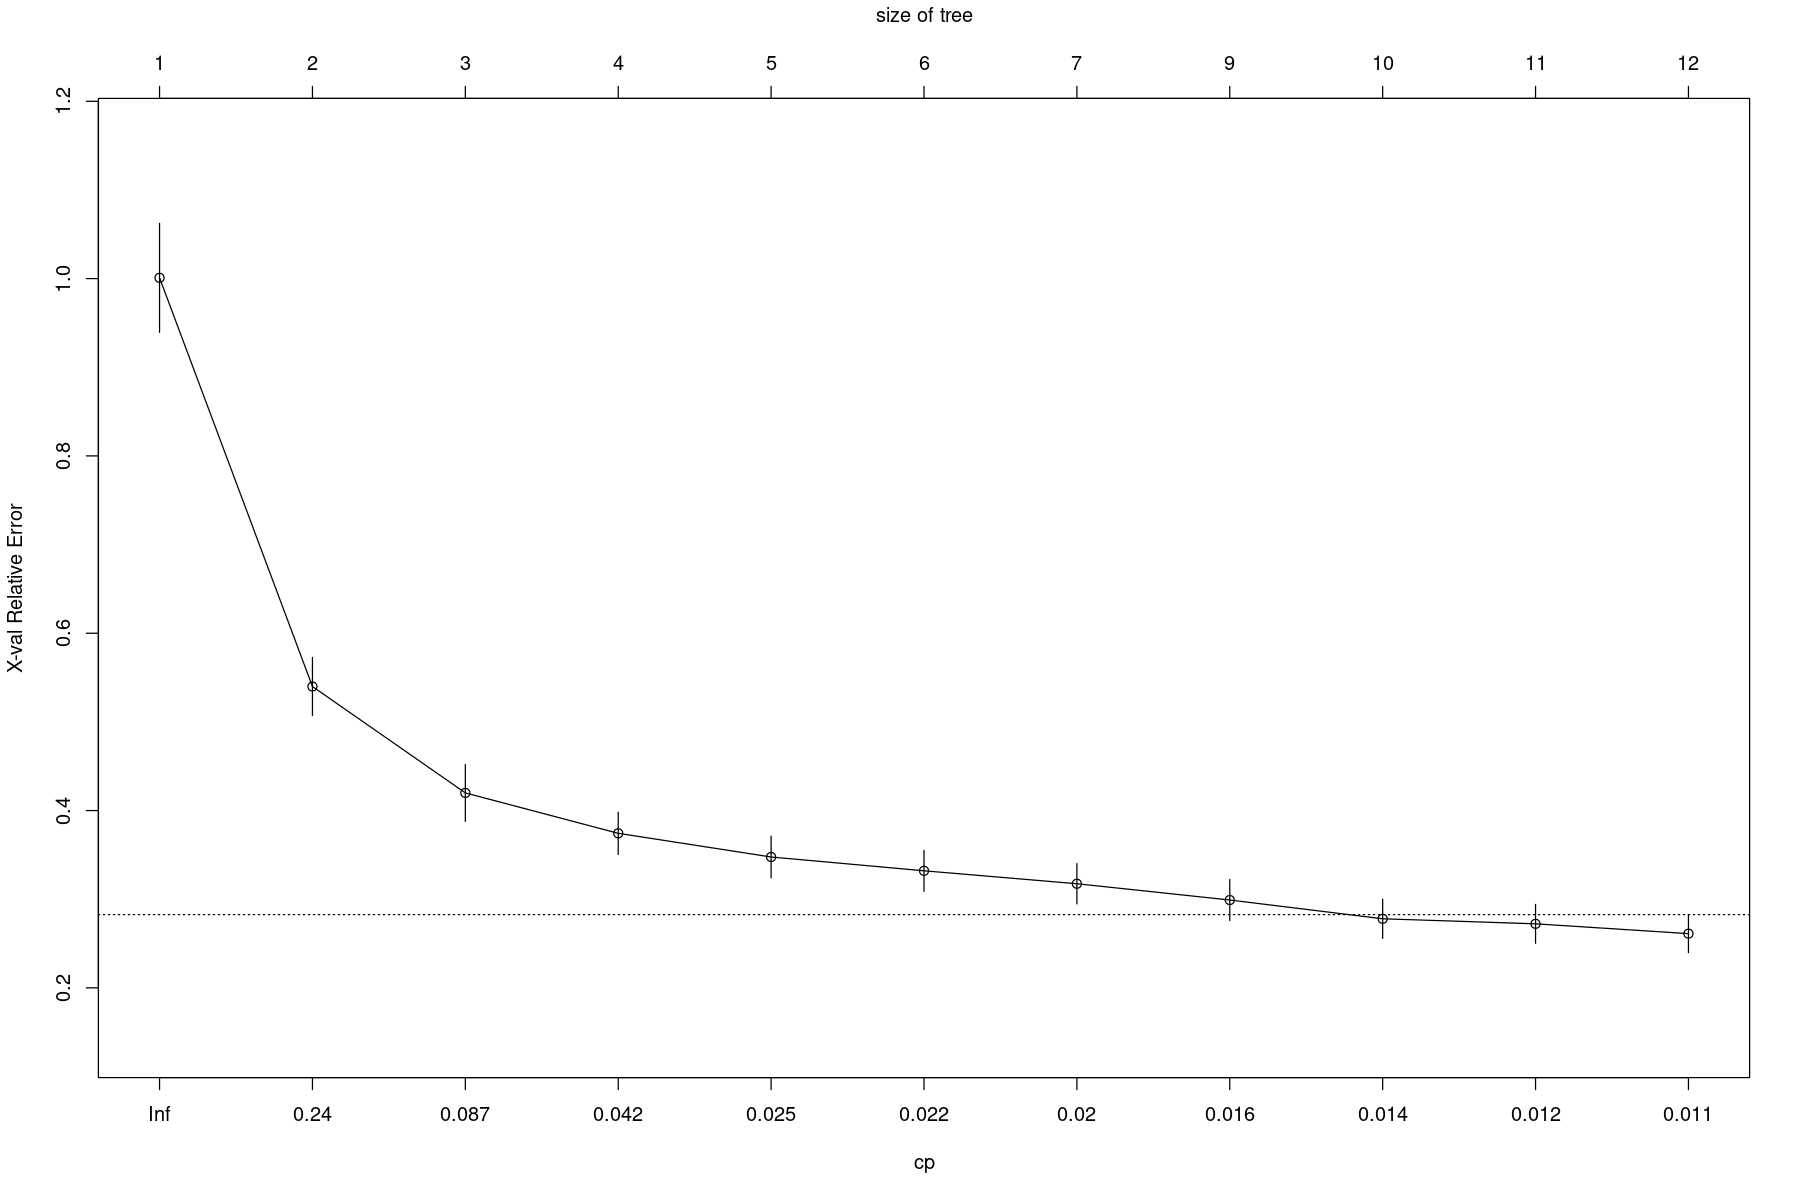

In [143]:
plotcp(ames_dt1)

Que pasa si queremos dejar que el arbol cresca sin restricciones?

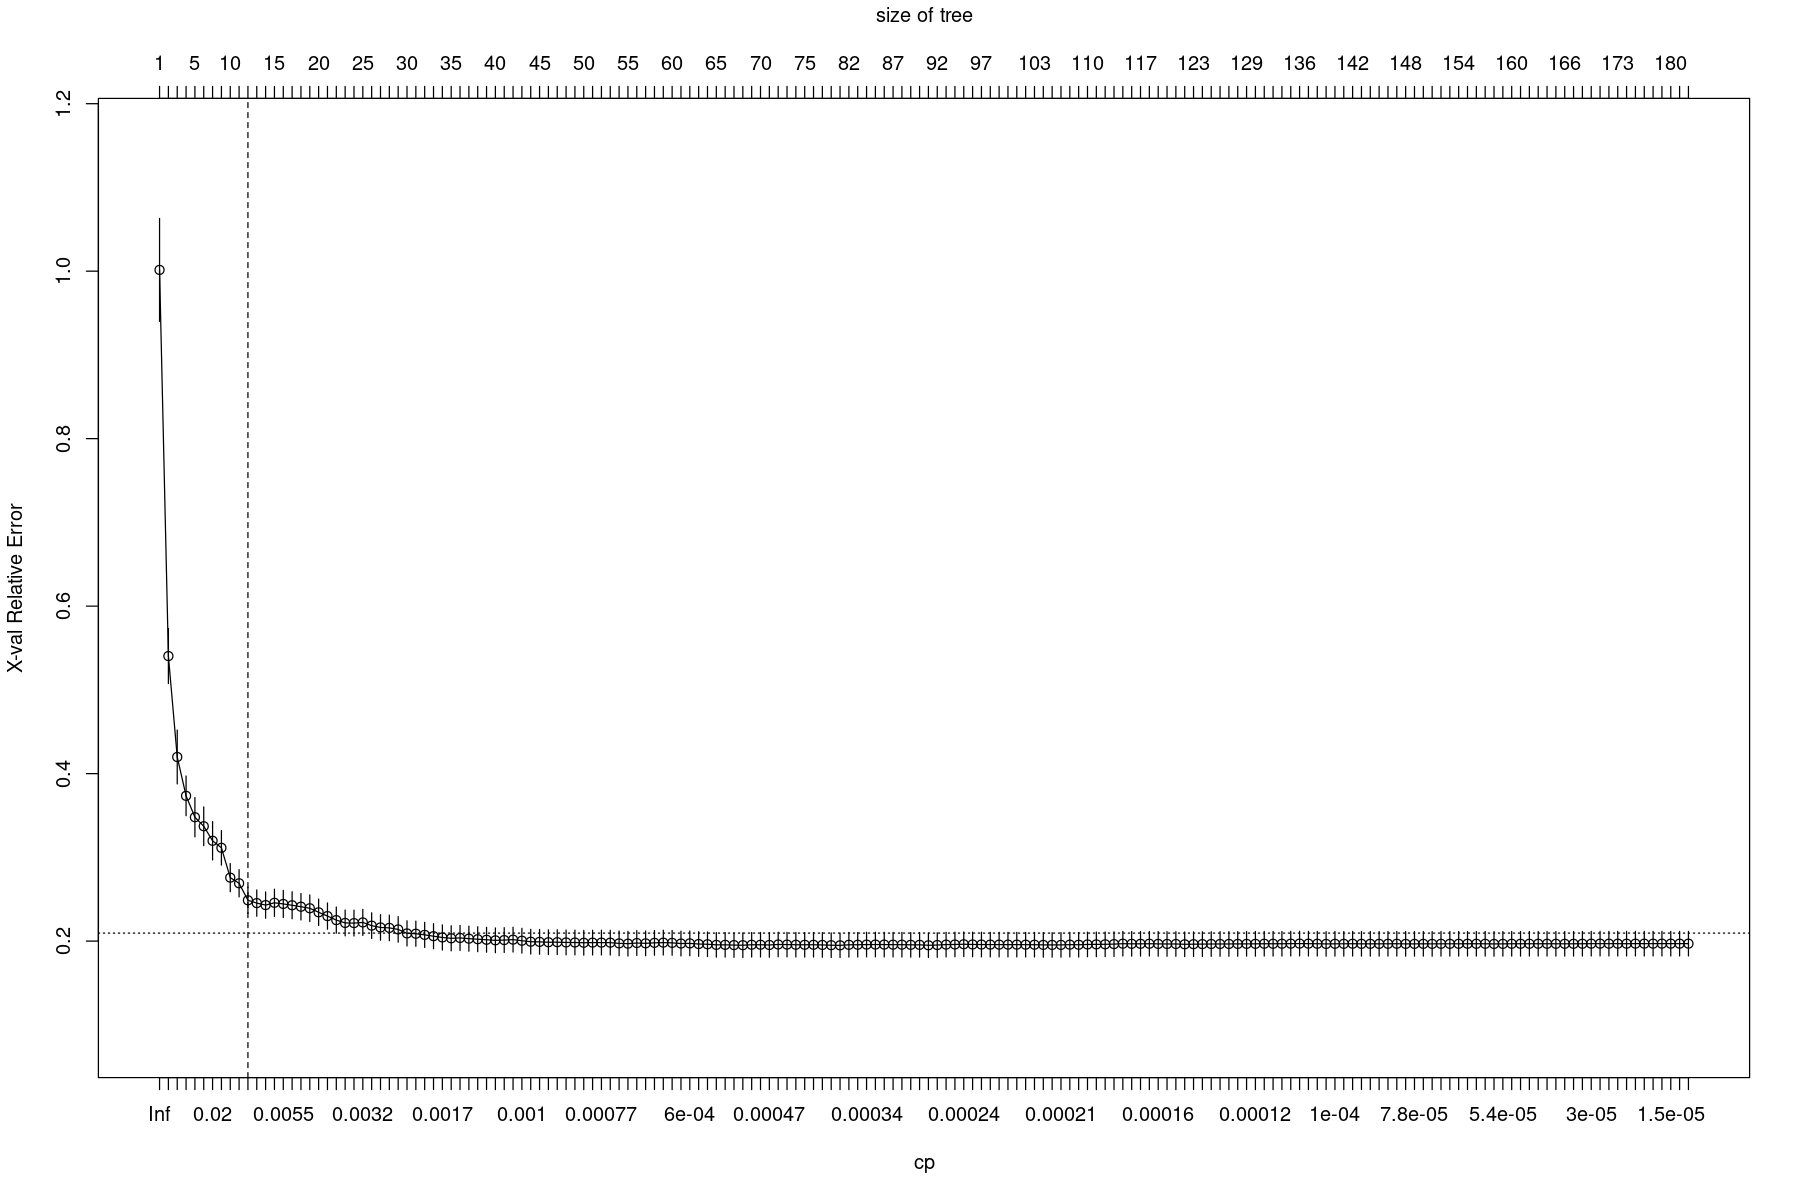

In [139]:
ames_dt2 <- rpart(
    formula = Sale_Price ~ .,
    data    = house_train,
    method  = "anova", 
    control = list(cp = 0, xval = 10)
)

plotcp(ames_dt2)
abline(v = 11, lty = "dashed")

Rpart no no tiene integrado otras metricas como RMSE para ellos vamos a usar Caret

In [ ]:
# caret cross validation results
ames_dt3 <- train(
  Sale_Price ~ .,
  data = house_train,
  method = "rpart",
  trControl = trainControl(method = "cv", number = 10),
  tuneLength = 20  ## number of diferent cp values
)

A menor cp mayor es al profundidad del arbol y menor es el error, pero tambien aumente la probabilidad de hacer overfitting

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


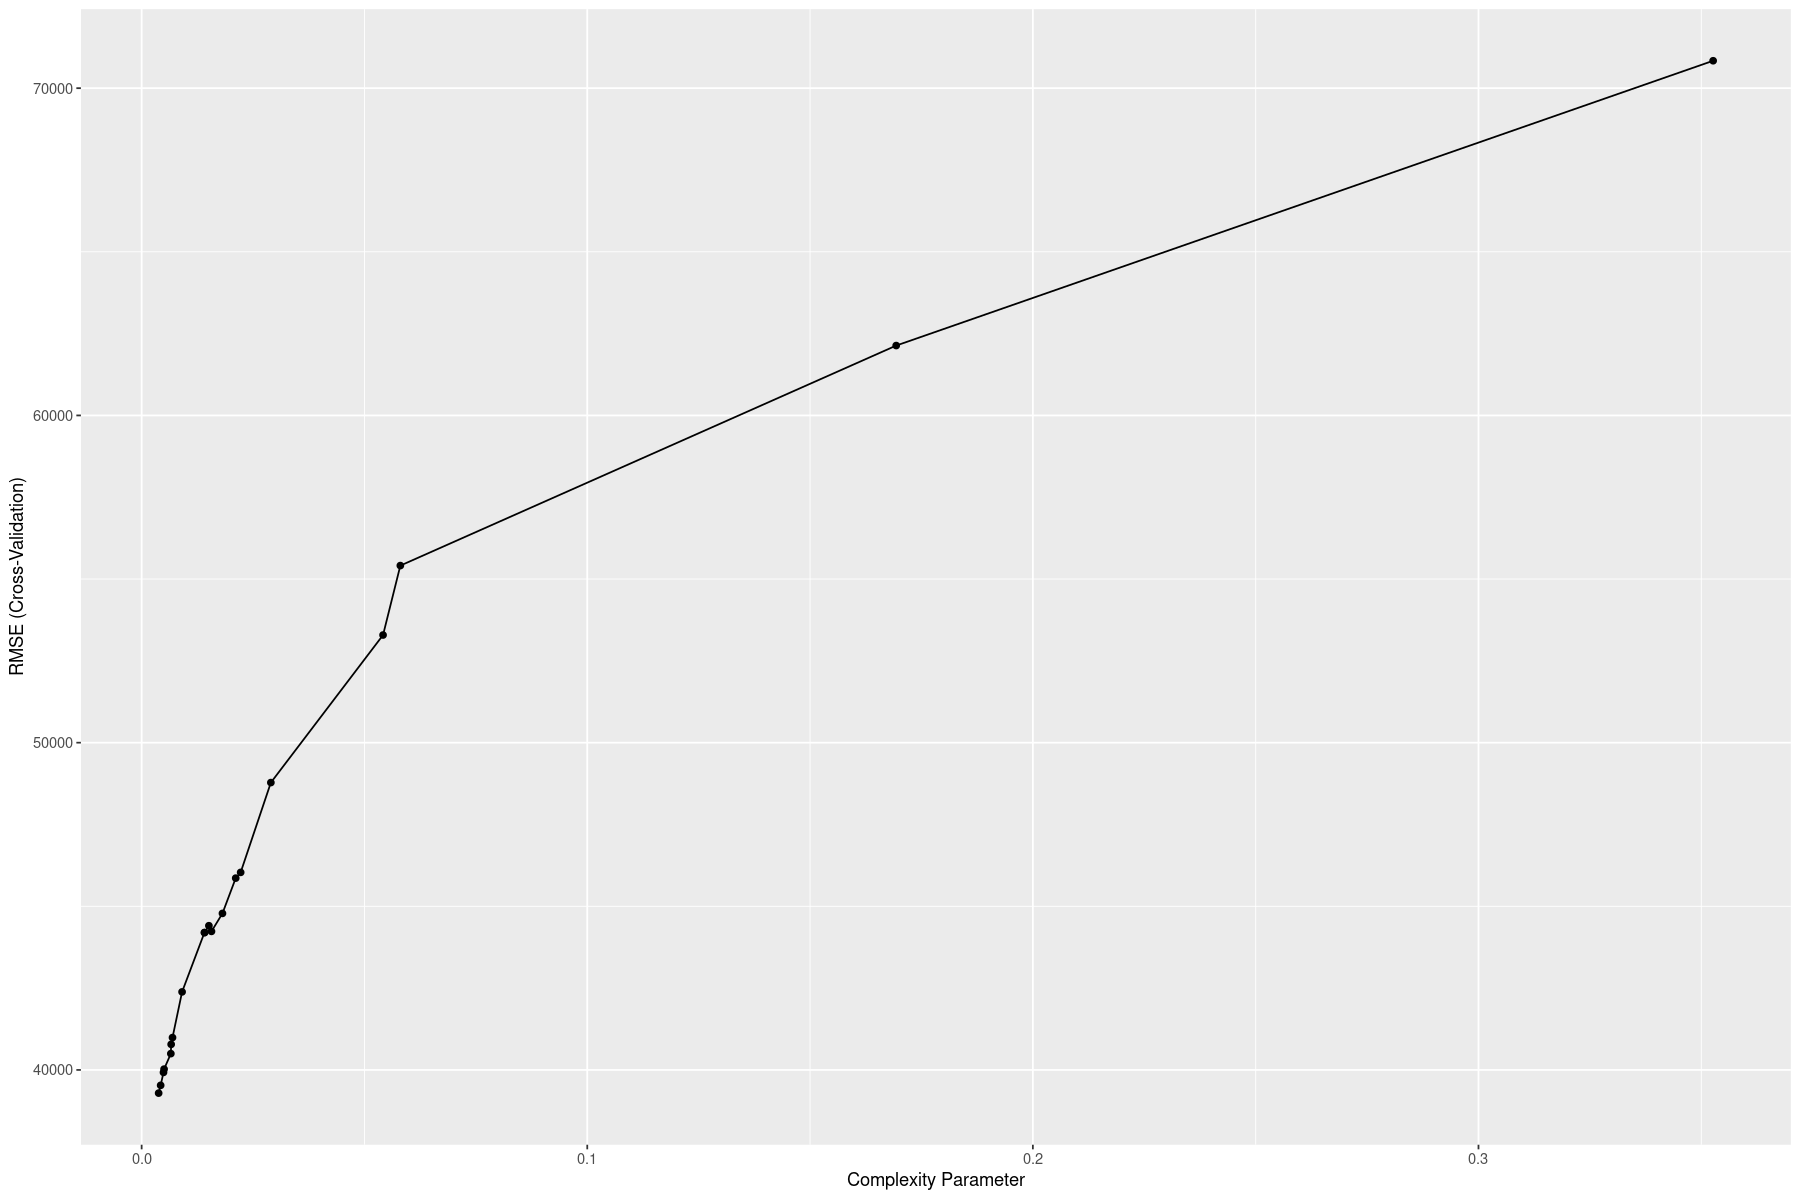

In [144]:
ggplot(ames_dt3)

## Feature importance
- La forma en la que se ponderan las variables se realiza sumando la reduccion en el error de cada split realizado usando una de las variables, dado que una misma variables se podria usar mas de una vez para hacer un split.
- Los abroles automaticamente hacen feaute selection para las variables poco informativas

Warning message in vip.default(ames_dt3, num_features = 40, bar = FALSE):
“The `bar` argument has been deprecated in favor of the new `geom` argument. It will be removed in version 0.3.0.”


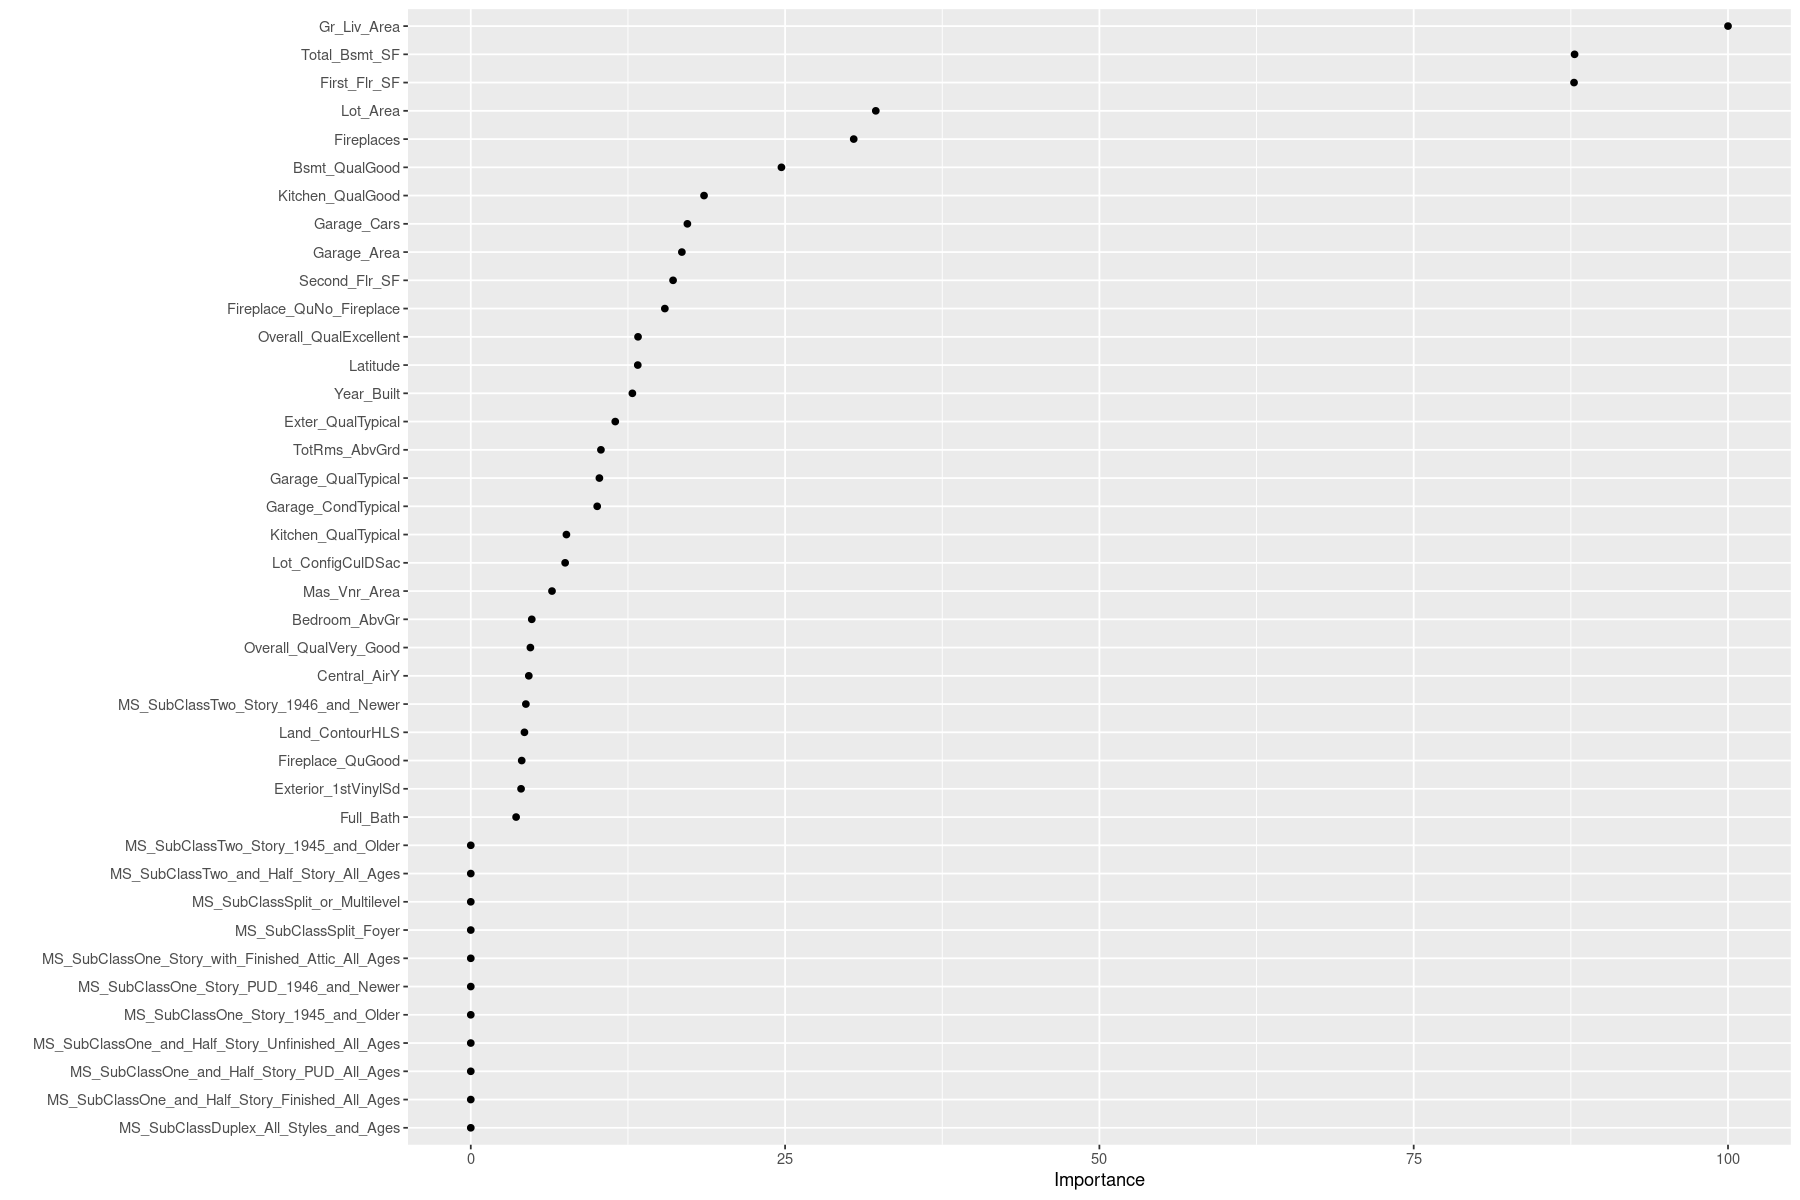

In [145]:
vip(ames_dt3, num_features = 40, bar = FALSE)

# Decision Tree - Classification

## Load Data

In [149]:
data("attrition", package = "modeldata")
# Job attrition data
attrition <- attrition %>% 
  mutate_if(is.ordered, .funs = factor, ordered = FALSE)

## Split Data

In [150]:
index_caret <- createDataPartition(attrition$Attrition, p = 0.7, list = FALSE)
attrition_train <- attrition[index_caret, ]
attrition_test  <- attrition[-index_caret, ]

## Modeling

In [152]:
?rpart

In [151]:
ames_dt1 <- rpart(
  formula = Sale_Price ~ .,
  data    = house_train,
  method  = "class"
)

class weight
* parms = list(prior = c(p1, 1 - p1)
* parms = list(split = 'information'), 